In [1]:
import cv2
import json
import torch
import math
import numpy as np

In [2]:
with open("/home/faris/repos/ec523-project/data/720p/train/Labels-ball.json", "r") as f:
    annotations = json.load(f)

In [3]:
annotations.keys()

dict_keys(['version', 'date', 'videos', 'labels'])

In [4]:
print(len(annotations['videos']))

4587


In [5]:
annotations['labels']

['PASS',
 'DRIVE',
 'HEADER',
 'HIGH PASS',
 'THROW IN',
 'CROSS',
 'SHOT',
 'OUT',
 'BALL PLAYER BLOCK',
 'PLAYER SUCCESSFUL TACKLE']

In [6]:
TOTAL_FRAMES = 750
ONE_FRAME = 25

In [7]:
label_count = dict.fromkeys(annotations['labels'], 0)

for i in annotations['videos']:
    print(i['path']+'\t')
    for j in i['annotations']['observation']:
        # print(j)
        label_count[j['label']] += 1

        label_frame = math.floor(int(j['position'])/ONE_FRAME)
        start_frame = label_frame - ONE_FRAME
        end_frame   = label_frame + ONE_FRAME
        print(f"{j['label']} frame{start_frame} to frame{end_frame}")

label_count

clip_1/720p.mp4	
HIGH PASS frame415 to frame465
HEADER frame573 to frame623
HEADER frame667 to frame717
DRIVE frame712 to frame762
PLAYER SUCCESSFUL TACKLE frame799 to frame849
DRIVE frame840 to frame890
HIGH PASS frame883 to frame933
PASS frame949 to frame999
DRIVE frame1026 to frame1076
HIGH PASS frame1082 to frame1132
PASS frame1173 to frame1223
clip_2/720p.mp4	
HIGH PASS frame1163 to frame1213
clip_3/720p.mp4	
CROSS frame525 to frame575
HEADER frame573 to frame623
OUT frame688 to frame738
clip_4/720p.mp4	
THROW IN frame223 to frame273
DRIVE frame253 to frame303
PASS frame304 to frame354
DRIVE frame335 to frame385
PASS frame376 to frame426
DRIVE frame463 to frame513
HIGH PASS frame693 to frame743
HEADER frame840 to frame890
DRIVE frame917 to frame967
PASS frame997 to frame1047
PASS frame1128 to frame1178
SHOT frame1167 to frame1217
clip_5/720p.mp4	
clip_6/720p.mp4	
HIGH PASS frame664 to frame714
HEADER frame797 to frame847
DRIVE frame861 to frame911
PASS frame1144 to frame1194
clip_

{'PASS': 15955,
 'DRIVE': 13689,
 'HEADER': 2387,
 'HIGH PASS': 2748,
 'THROW IN': 1269,
 'CROSS': 1059,
 'SHOT': 600,
 'OUT': 1983,
 'BALL PLAYER BLOCK': 762,
 'PLAYER SUCCESSFUL TACKLE': 204}

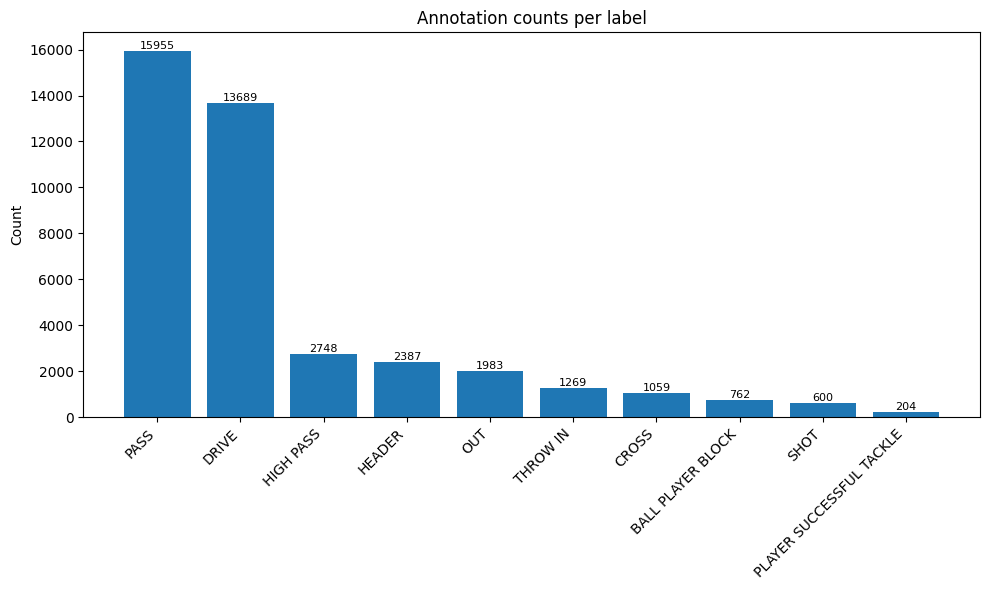

In [8]:
import matplotlib.pyplot as plt

labels, counts = zip(*sorted(label_count.items(), key=lambda x: x[1], reverse=True))

plt.figure(figsize=(10, 6))
bars = plt.bar(labels, counts, color='C0')
plt.xticks(rotation=45, ha='right')
plt.ylabel('Count')
plt.title('Annotation counts per label')
for bar, cnt in zip(bars, counts):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), str(cnt), ha='center', va='bottom', fontsize=8)
plt.tight_layout()
plt.show()